In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/diamonds.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
diamonds = pd.read_csv('data/diamonds.csv')

In [5]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamonds.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
diamonds.set_index('id', inplace=True)

In [7]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
id,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [9]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
diamonds.groupby('cut').size()

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
dtype: int64

In [12]:
sns.set()

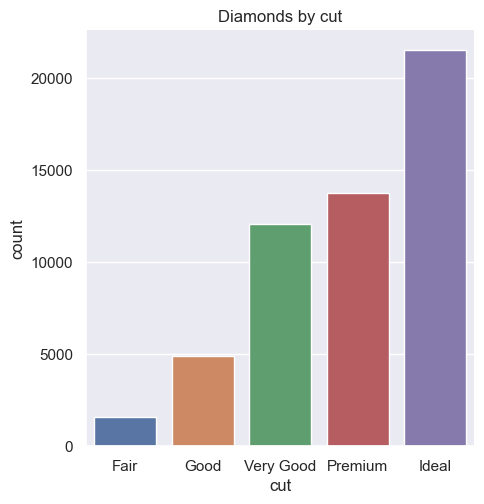

In [13]:
category_lst = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
sns.catplot(data=diamonds, x='cut', kind='count', order=category_lst)
plt.title('Diamonds by cut')
plt.show()

In [14]:
diamonds.groupby(['cut', 'color']).size()


cut        color
Fair       D         163
           E         224
           F         312
           G         314
           H         303
           I         175
           J         119
Good       D         662
           E         933
           F         909
           G         871
           H         702
           I         522
           J         307
Ideal      D        2834
           E        3903
           F        3826
           G        4884
           H        3115
           I        2093
           J         896
Premium    D        1603
           E        2337
           F        2331
           G        2924
           H        2360
           I        1428
           J         808
Very Good  D        1513
           E        2400
           F        2164
           G        2299
           H        1824
           I        1204
           J         678
dtype: int64

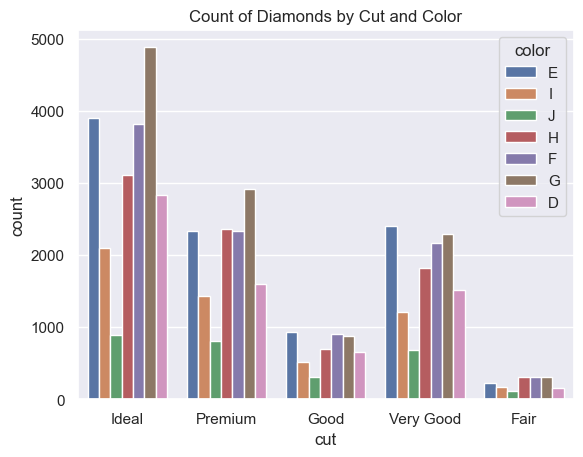

In [15]:
sns.countplot(data=diamonds, x='cut', hue='color')
plt.title("Count of Diamonds by Cut and Color")
plt.show()

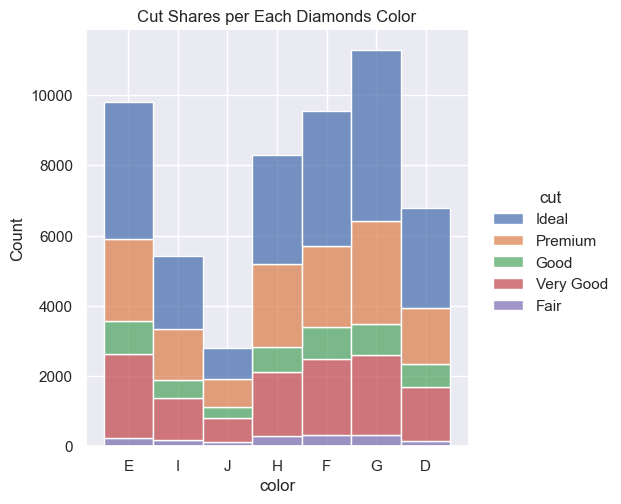

In [16]:
sns.displot(data=diamonds, x='color', hue='cut', multiple='stack', binwidth=2)
plt.title('Cut Shares per Each Diamonds Color')
plt.show()

In [17]:
diamonds.groupby('clarity')['price'].agg('mean')

clarity
I1      3924.168691
IF      2864.839106
SI1     3996.001148
SI2     5063.028606
VS1     3839.455391
VS2     3924.989395
VVS1    2523.114637
VVS2    3283.737071
Name: price, dtype: float64

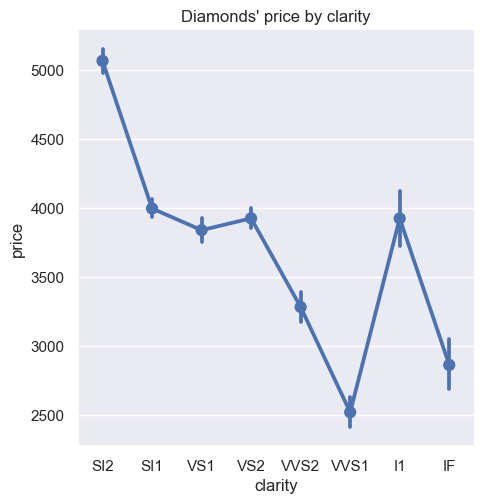

In [18]:
sns.catplot(data=diamonds, x='clarity', y='price', kind='point')
plt.title("Diamonds' price by clarity")
plt.show()

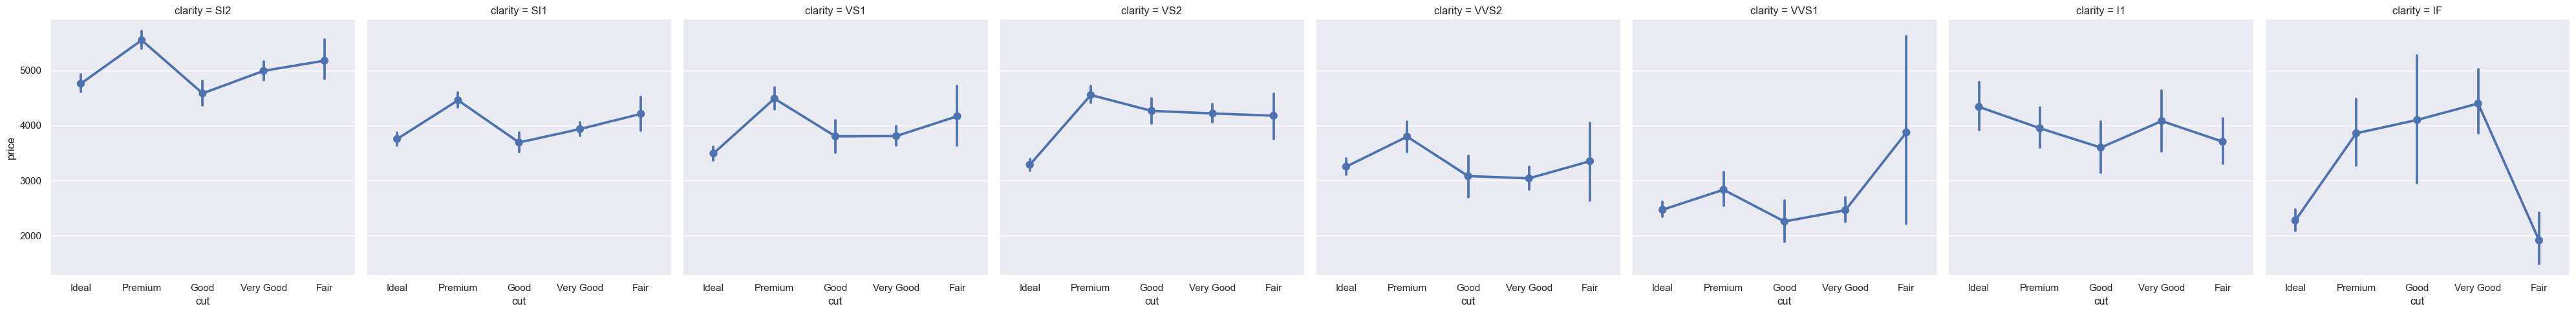

In [19]:
sns.catplot(data=diamonds, x='cut', y='price', kind='point', col='clarity')
plt.tight_layout()
plt.show()

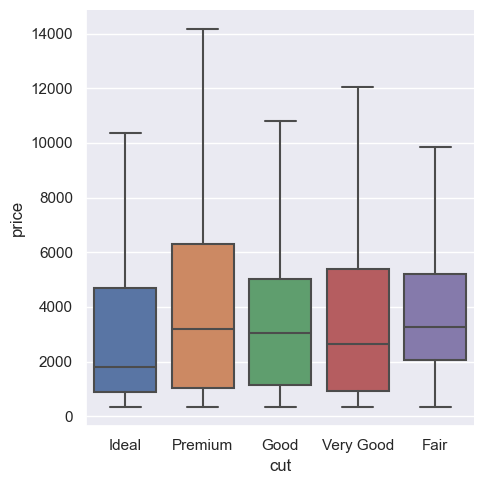

In [20]:
sns.catplot(data=diamonds, x='cut', y='price', kind='box', sym='')
plt.show()

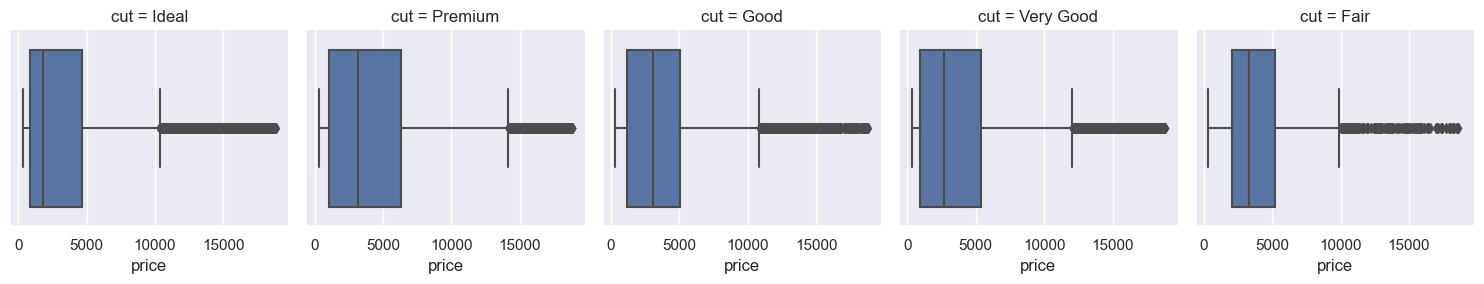

In [21]:
s = sns.FacetGrid(diamonds, col='cut')
s.map(sns.boxplot, 'price', order=category_lst)
plt.show()

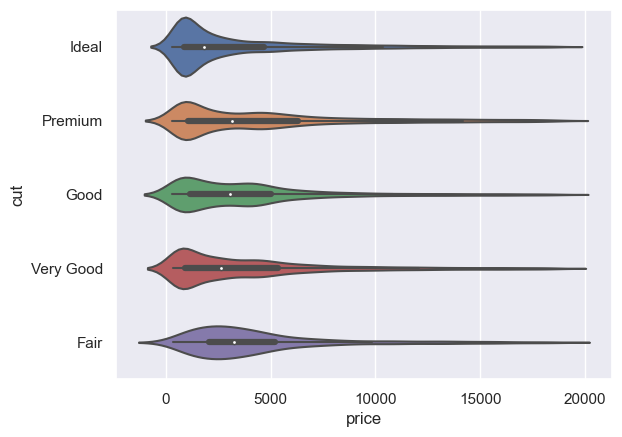

In [22]:
sns.violinplot(data=diamonds, y='cut', x='price', col='clarity')
plt.show()

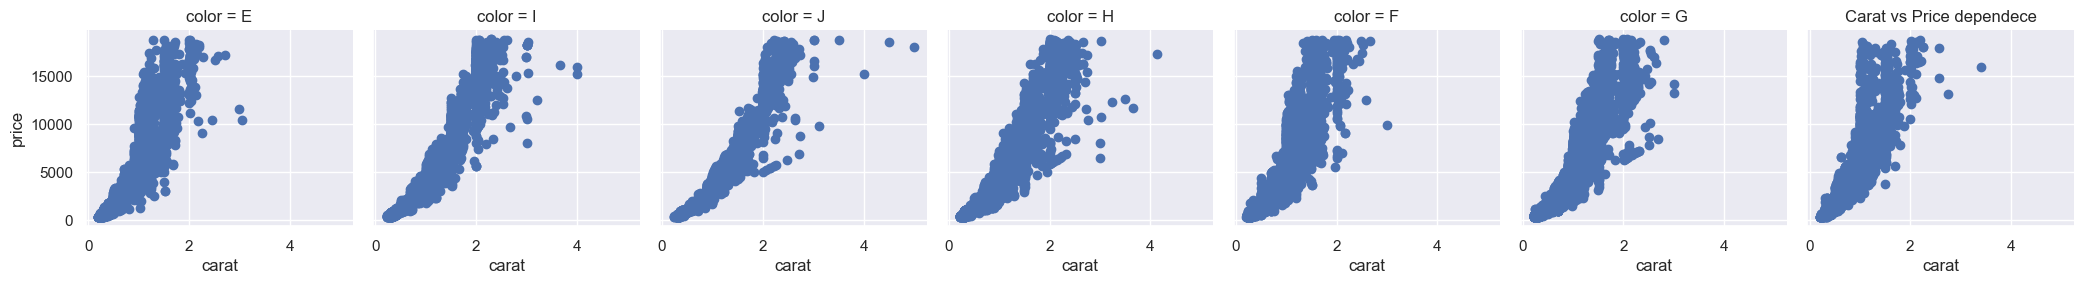

In [23]:
k = sns.FacetGrid(diamonds, col='color')
k.map(plt.scatter, 'carat', 'price')
plt.title('Carat vs Price dependece')
plt.show()

In [25]:
sns.set_palette("husl", 8)

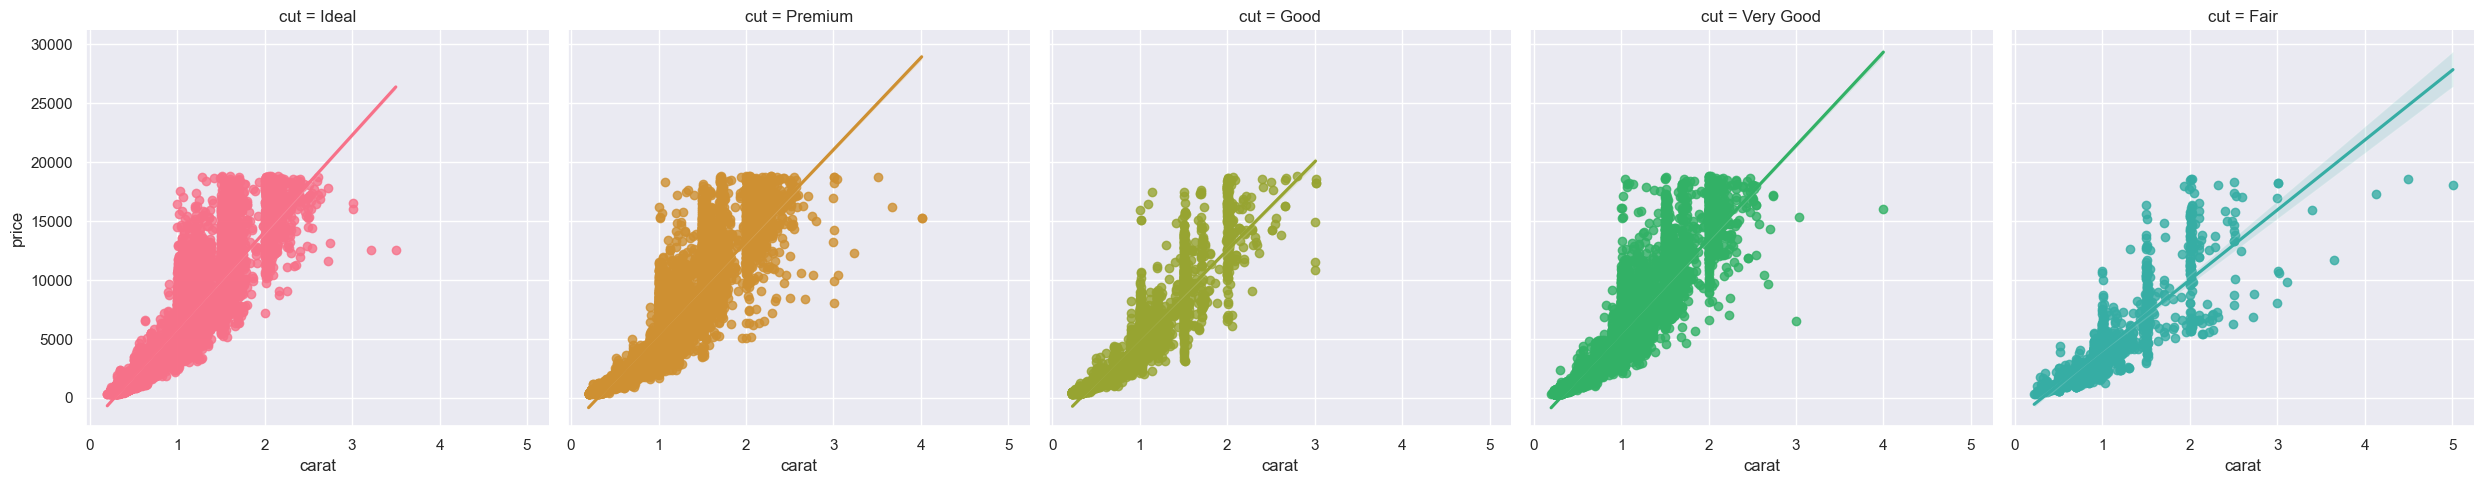

In [26]:
sns.lmplot(data=diamonds, x='carat', y='price', hue='cut', col='cut')
plt.show()

In [27]:
corr = diamonds[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


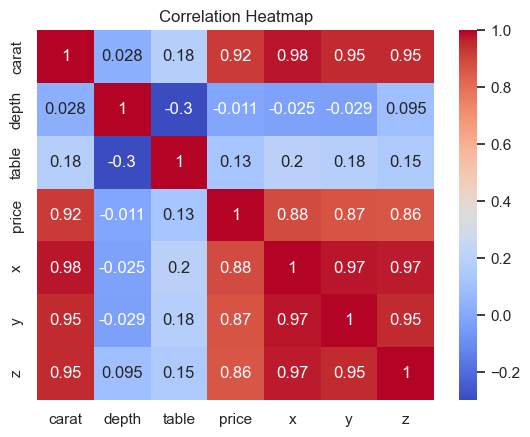

In [28]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error 
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn.axisgrid")

# warnings.filterwarnings("ignore")

In [32]:
data=diamonds
data

,carat,cut,color,clarity,depth,table,price,x,y,z
id,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [33]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [34]:
data.duplicated().sum()

146

In [35]:
data = data.drop_duplicates()

In [36]:
data.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


depth   -0.011048
table    0.126566
z        0.861208
y        0.865395
x        0.884504
carat    0.921548
price    1.000000
Name: price, dtype: float64


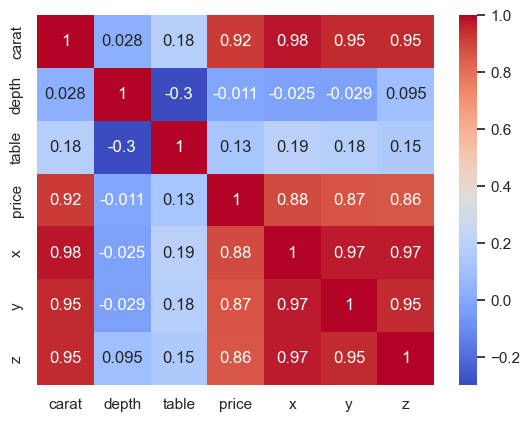

In [37]:
dropFeatures = ["cut","color","clarity"]
dataNumeric = data.drop(dropFeatures, axis=1)
corr = dataNumeric.corr()
sns.heatmap(corr, annot = True, cmap="coolwarm")
print(dataNumeric.corr()["price"].sort_values())

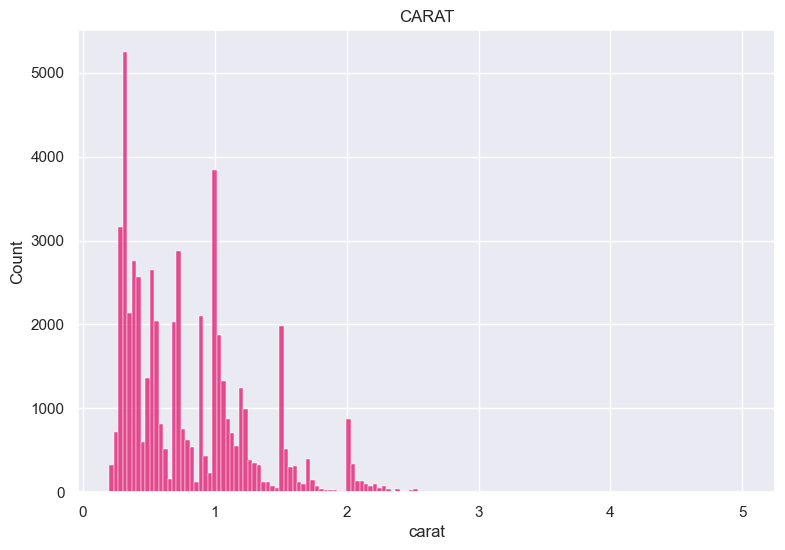

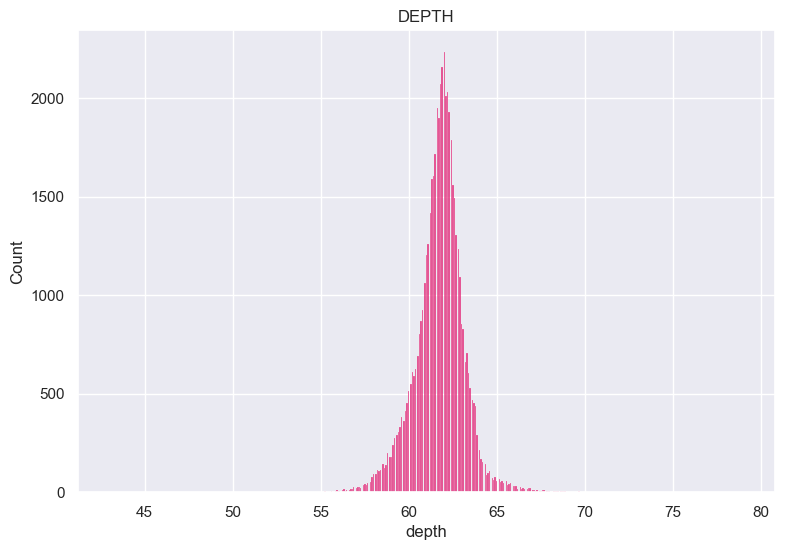

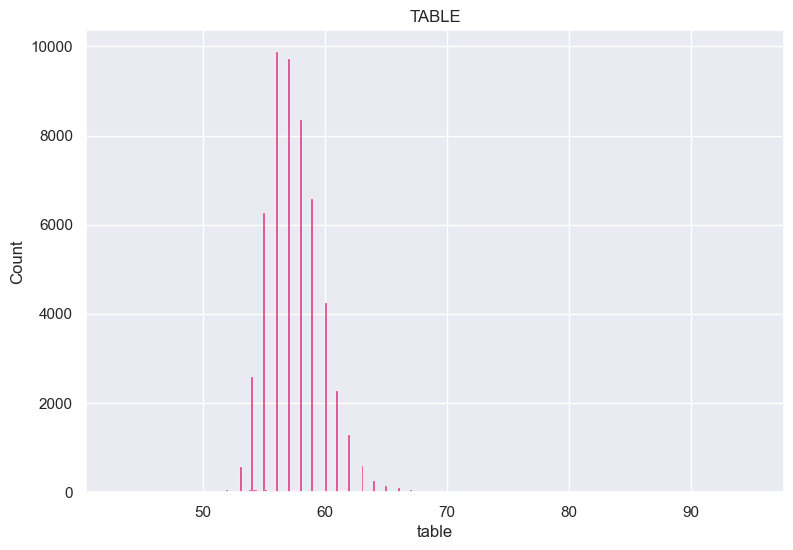

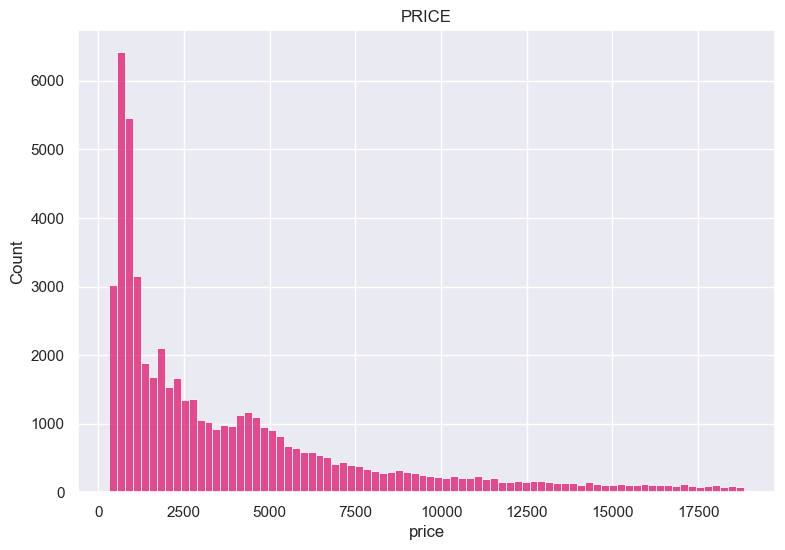

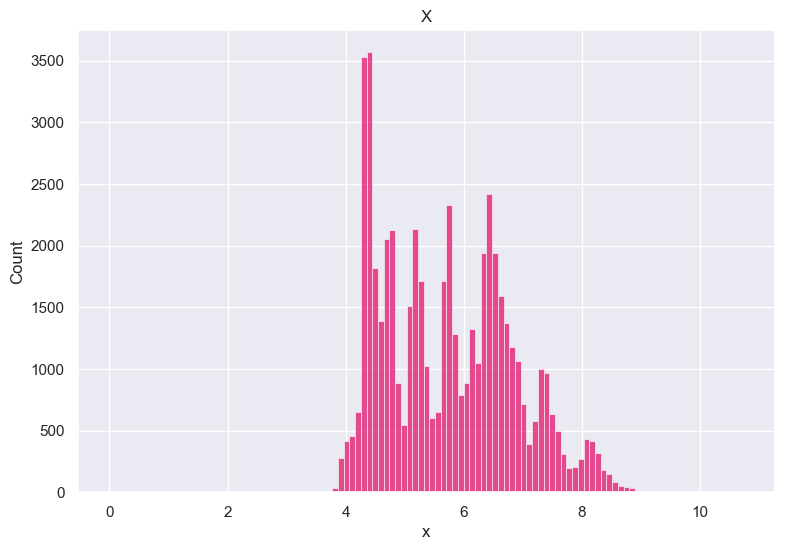

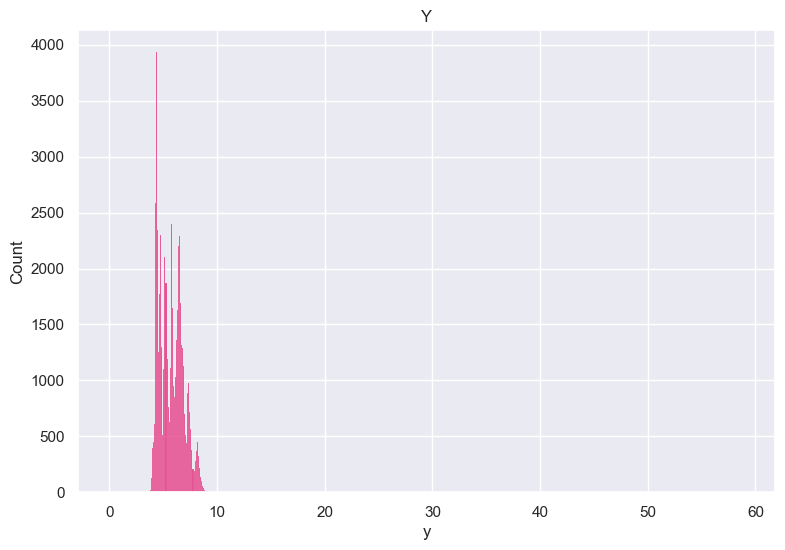

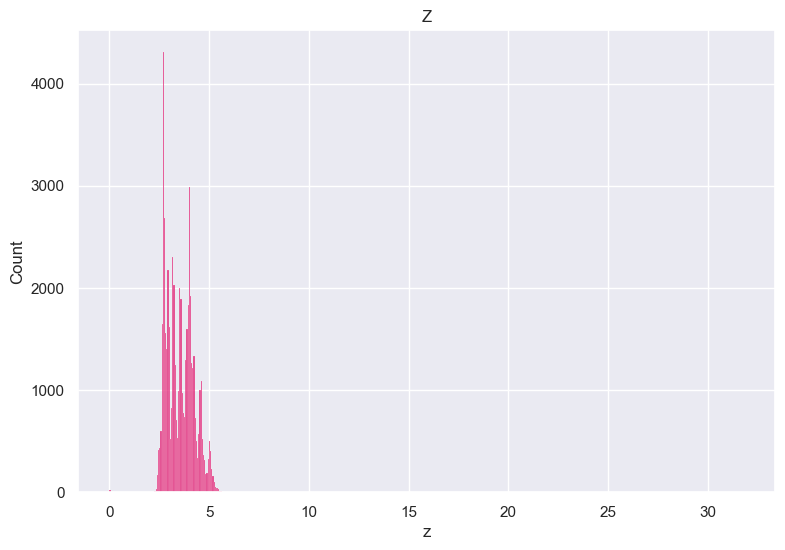

In [38]:
feature = 0
while (feature <= 9):
    if feature == 1 or feature == 2 or feature == 3:
        feature += 1
        continue
    else:
        plt.figure(figsize=(9,6))
        sns.histplot(data=data, x=data.iloc[:,feature], color="#E1156D")
        plt.title(f"{data.columns[feature].upper()}")
        plt.show()
        feature += 1

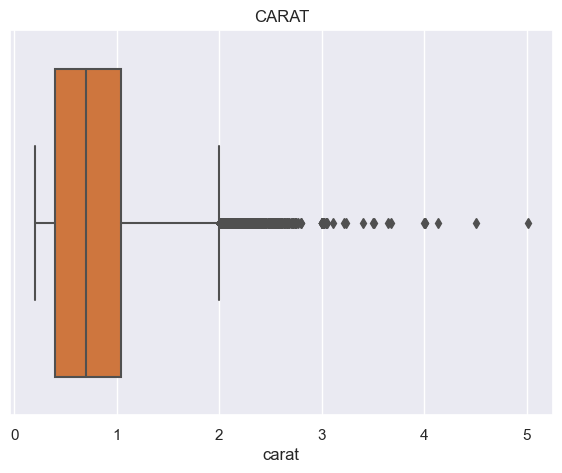

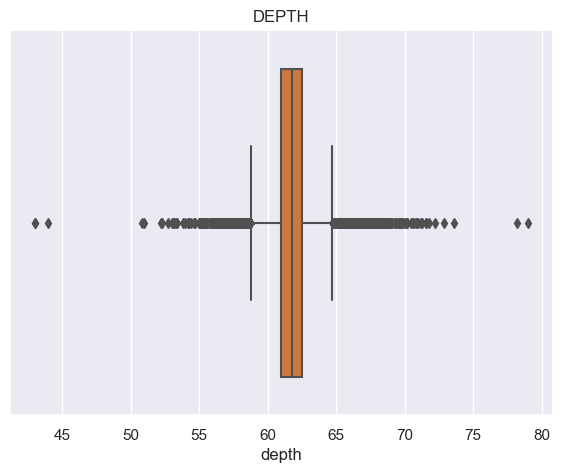

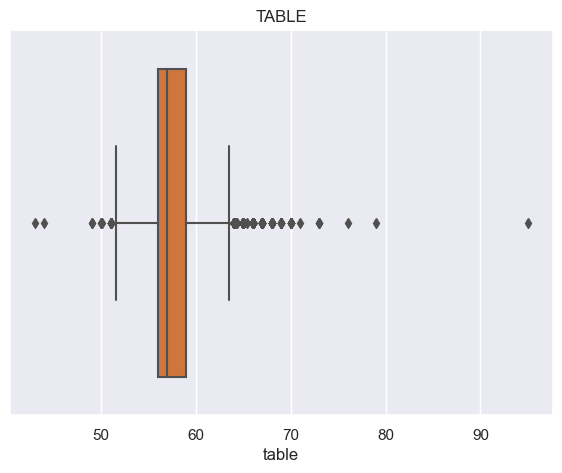

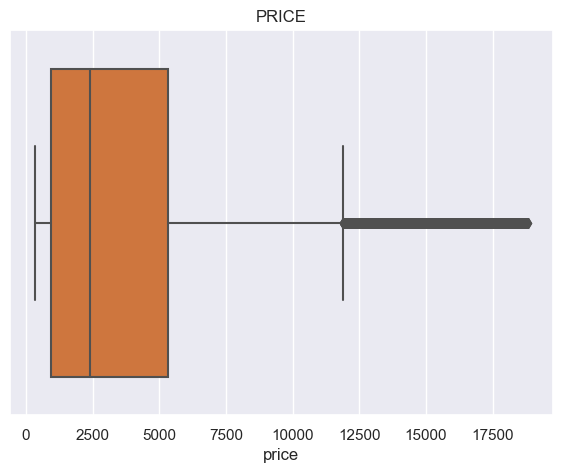

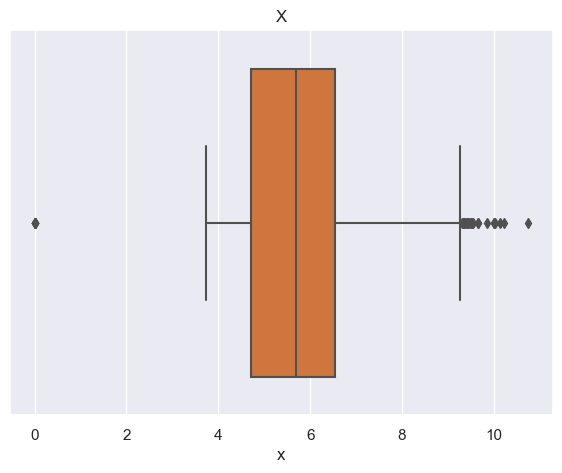

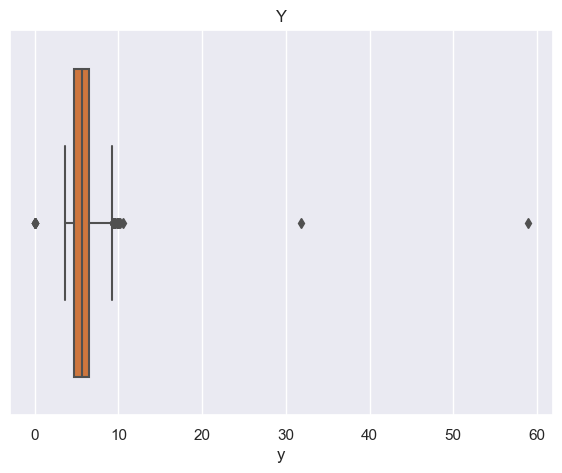

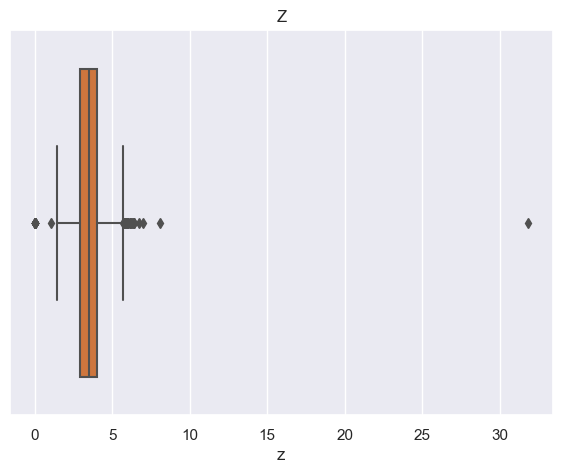

In [39]:
feature = 0
while (feature <= 9):
    if feature == 1 or feature == 2 or feature == 3:
        feature += 1
        continue
    else:
        plt.figure(figsize=(7,5))
        sns.boxplot(data=data, x=data.iloc[:,feature], color="#E67126")
        plt.title(f"{data.columns[feature].upper()}")
        plt.show()
        feature += 1

<Axes: xlabel='carat', ylabel='price'>

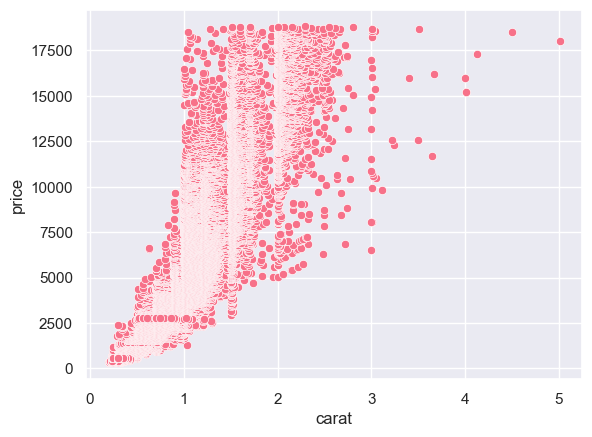

In [40]:
sns.scatterplot(data=data, x="carat", y="price")

<Axes: xlabel='x', ylabel='price'>

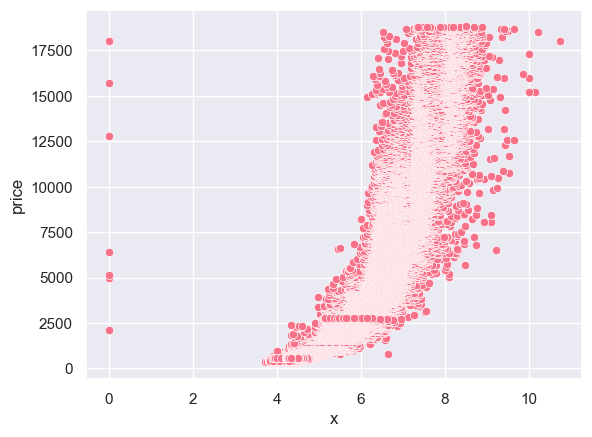

In [41]:
sns.scatterplot(data=data, x="x", y="price")

<Axes: xlabel='y', ylabel='price'>

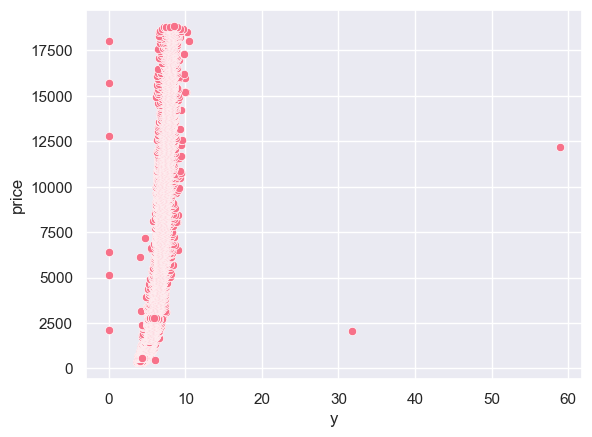

In [42]:
sns.scatterplot(data=data, x="y", y="price")

<Axes: xlabel='z', ylabel='price'>

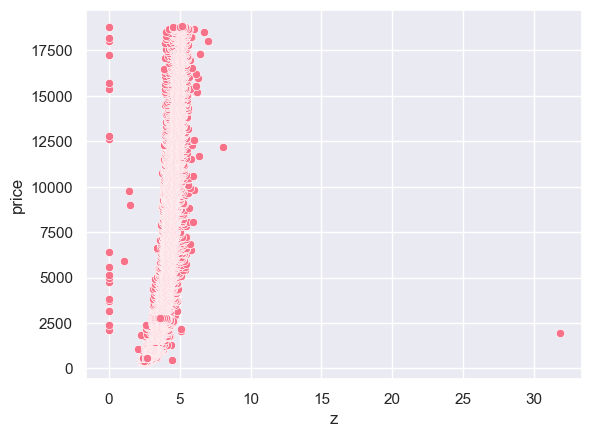

In [43]:
sns.scatterplot(data=data, x="z", y="price")

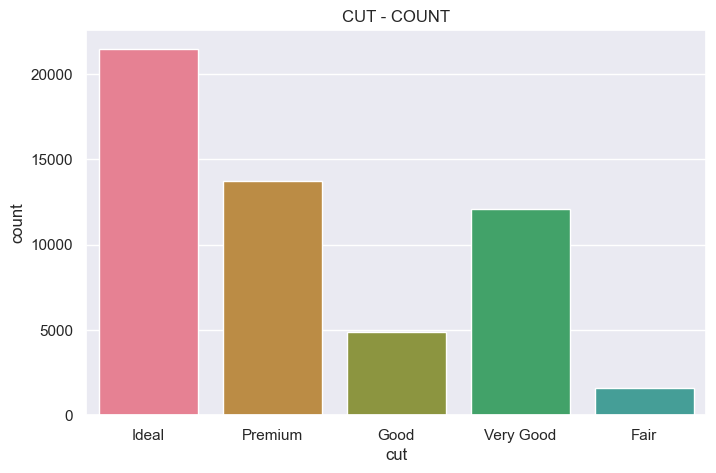

Cut: Fair, Number of data: 1598
Cut: Good, Number of data: 4891
Cut: Ideal, Number of data: 21488
Cut: Premium, Number of data: 13748
Cut: Very Good, Number of data: 12069


In [44]:
#There are three non-numeric feature in dataset. Non-numeric data will be graphed to understand the data correctly.
plt.figure(figsize=(8,5))
sns.countplot(x="cut", data=data)
plt.title("CUT - COUNT")
plt.show()

counts = data["cut"].value_counts()
for i,j in data["cut"].value_counts().sort_index().items():
    print(f"Cut: {i}, Number of data: {j}")

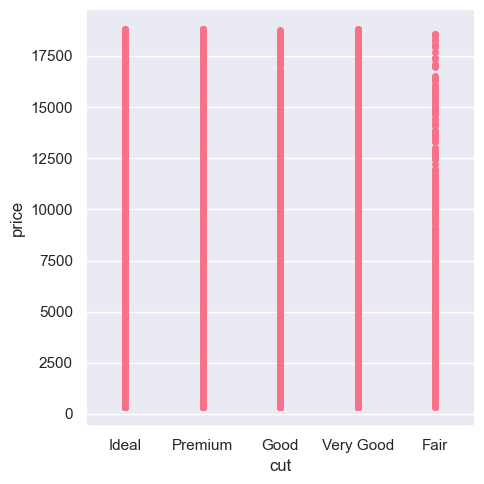

In [45]:
sns.catplot(data=data, x="cut", y="price", jitter=False)

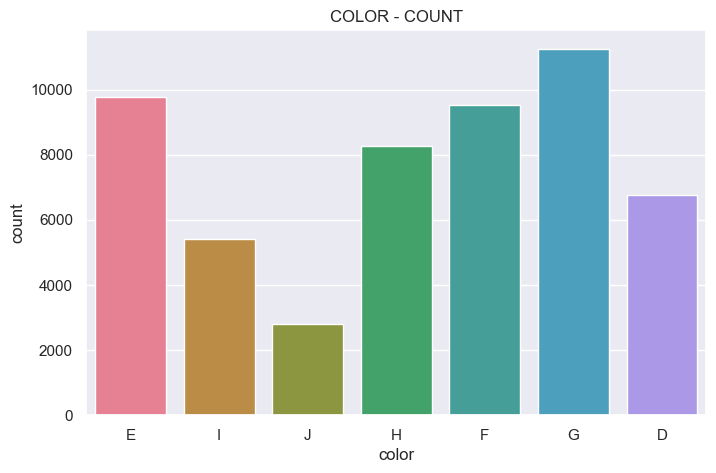

Color: D, Number of data: 6755
Color: E, Number of data: 9776
Color: F, Number of data: 9520
Color: G, Number of data: 11262
Color: H, Number of data: 8272
Color: I, Number of data: 5407
Color: J, Number of data: 2802


In [46]:
plt.figure(figsize=(8,5))
sns.countplot(x="color", data=data)
plt.title("COLOR - COUNT")
plt.show()

counts = data["color"].value_counts()
for i,j in data["color"].value_counts().sort_index().items():
    print(f"Color: {i}, Number of data: {j}")

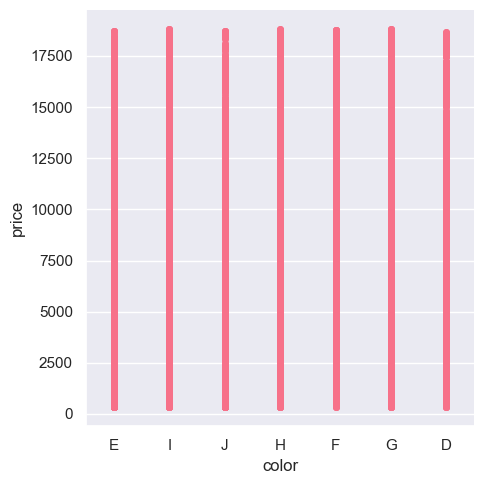

In [47]:
sns.catplot(data=data, x="color", y="price", jitter=False)

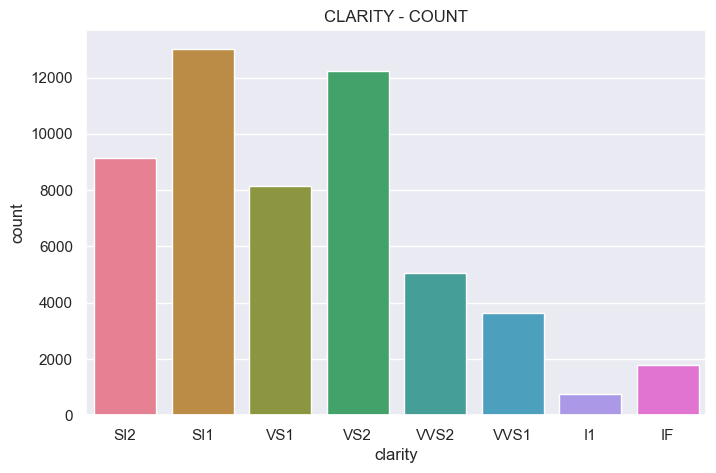

Clarity: I1, Number of data: 740
Clarity: IF, Number of data: 1784
Clarity: SI1, Number of data: 13032
Clarity: SI2, Number of data: 9150
Clarity: VS1, Number of data: 8156
Clarity: VS2, Number of data: 12229
Clarity: VVS1, Number of data: 3647
Clarity: VVS2, Number of data: 5056


In [48]:
plt.figure(figsize=(8,5))
sns.countplot(x="clarity", data=data)
plt.title("CLARITY - COUNT")
plt.show()

counts = data["clarity"].value_counts()
for i,j in data["clarity"].value_counts().sort_index().items():
    print(f"Clarity: {i}, Number of data: {j}")

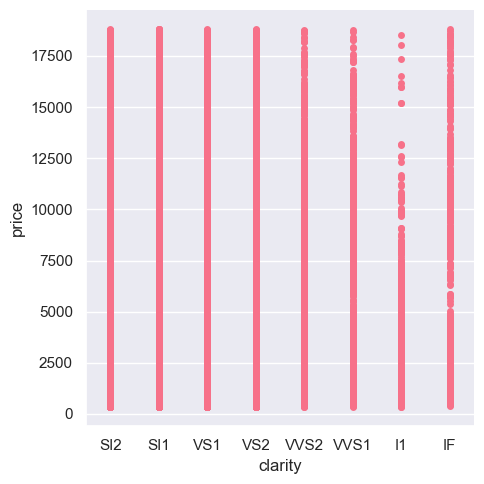

In [49]:
sns.catplot(data=data, x="clarity", y="price", jitter=False)

In [50]:
#Data Transformation
data["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [51]:
data["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [52]:
data["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [53]:
cutMapping = {"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}
colorMapping = {"D":1, "E":2, "F":3, "G":4, "H":5, "I":6, "J":7}
clarityMapping = {"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}

data["cut"] = data["cut"].map(cutMapping)
data["color"] = data["color"].map(colorMapping)
data["clarity"] = data["clarity"].map(clarityMapping)

/var/folders/tp/t_2z79dj20x4qnpv828bg_8c0000gn/T/ipykernel_2865/2625824435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cut"] = data["cut"].map(cutMapping)
/var/folders/tp/t_2z79dj20x4qnpv828bg_8c0000gn/T/ipykernel_2865/2625824435.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["color"] = data["color"].map(colorMapping)
/var/folders/tp/t_2z79dj20x4qnpv828bg_8c0000gn/T/ipykernel_2865/2625824435.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [54]:
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
id,,,,,,,,,,
1,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,3,7,6,62.8,57.0,336,3.94,3.96,2.48
7,0.24,3,6,7,62.3,57.0,336,3.95,3.98,2.47
8,0.26,3,5,3,61.9,55.0,337,4.07,4.11,2.53
9,0.22,1,2,4,65.1,61.0,337,3.87,3.78,2.49


In [55]:
x = data.drop("price", axis=1).values
y = data["price"].values
print(x,y)

[[0.23 5.   2.   ... 3.95 3.98 2.43]
 [0.21 4.   2.   ... 3.89 3.84 2.31]
 [0.23 2.   2.   ... 4.05 4.07 2.31]
 ...
 [0.7  3.   1.   ... 5.66 5.68 3.56]
 [0.86 4.   5.   ... 6.15 6.12 3.74]
 [0.75 5.   1.   ... 5.83 5.87 3.64]] [ 326  326  327 ... 2757 2757 2757]


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=0)

In [57]:
print(f"x_train shape: {x_train.shape}\nx_test shape: {x_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

x_train shape: (36041, 9)
x_test shape: (17753, 9)
y_train shape: (36041,)
y_test shape: (17753,)


In [58]:
#scaling
scaler = StandardScaler()

In [59]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [60]:
#Linear Regression¶
regLR = LinearRegression()
regLR.fit(x_train,y_train)
predictionLR = regLR.predict(x_test)

In [61]:
#Polynomial Regression¶
regPoly = PolynomialFeatures(degree = 2)
xPoly = regPoly.fit_transform(x_train)
regLR.fit(xPoly,y_train)
predictionPoly = regLR.predict(regPoly.fit_transform(x_test))

In [64]:
#SVR
regSVR = SVR(kernel = "linear")
regSVR.fit(x_train, y_train)
predictionSVR = regSVR.predict(x_test)

In [66]:
#DT
regDT = DecisionTreeRegressor(random_state=0)
regDT.fit(x_train,y_train)
predictionDT = regDT.predict(x_test)

In [67]:
#RF
regRF = RandomForestRegressor(n_estimators=1000, random_state=0)
regRF.fit(x_train,y_train)
predictionRF = regRF.predict(x_test)

In [68]:
listForModels = ["Linear Regression", "Polynomial Regression", "Support Vector Regression", "Decision Tree", "Random Forest"]
listForPredictions = [predictionLR, predictionPoly, predictionSVR, predictionDT, predictionRF]

def comparisonModels(listForModels,listForPredictions,y_test):
    
    for modelName, predictions in zip(listForModels, listForPredictions):
        
        mae = round(mean_absolute_error(y_test,predictions), 1)
        r2 = round(r2_score(y_test,predictions), 2)
        mape = round(mean_absolute_percentage_error(y_test,predictions)*100, 1)
        
        
        print(f"Model Name: {modelName}")
        print(f"Mean Absoulute Error: {mae}")
        print(f"R-Score: {r2}")
        print(f"Mean Absoulute Percentage Error: {mape}%")
        print("\n")

comparisonModels(listForModels,listForPredictions,y_test)

Model Name: Linear Regression
Mean Absoulute Error: 809.4
R-Score: 0.91
Mean Absoulute Percentage Error: 43.6%


Model Name: Polynomial Regression
Mean Absoulute Error: 476.9
R-Score: 0.81
Mean Absoulute Percentage Error: 19.8%


Model Name: Support Vector Regression
Mean Absoulute Error: 834.2
R-Score: 0.86
Mean Absoulute Percentage Error: 31.0%


Model Name: Decision Tree
Mean Absoulute Error: 360.7
R-Score: 0.97
Mean Absoulute Percentage Error: 8.6%


Model Name: Random Forest
Mean Absoulute Error: 267.9
R-Score: 0.98
Mean Absoulute Percentage Error: 6.4%


